# Machine Learning Model (Logistic Regression)
- **ZACHARY NG HUA EN, 26/8/22**

<u>**Table of Contents**</u>
 - <a href="#E0">1. Loading and Cleaning Data</a>
 - <a href="#E1">2. Supervised Model - Logistic Regression</a>

***
## <a name="E0">1. Loading And Cleaning Data

***
#### Install necessary libraries
First we will install the necessary libraries to run the following code.

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

***
#### Importing libraries
Then we will import the libraries we need to run the following code.

In [44]:
import numpy as np

import pandas as pd
from scipy import stats
import pickle
import warnings

# Plotting libraries
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Filter warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline

***
#### Loading Data
Here we load the CSV data collected from the Python script into pandas dataframe

In [118]:
ping_df = pd.read_csv('ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

***
#### Data Cleaning 
Drop any rows that contain NaN (no value)

In [119]:
df.dropna(inplace=True)

***
**Drop the Forward Packets, Forward Bytes, Reverse Packets, Reverse Bytes data.**

Reason:

* This data is not useful as a feature in the model because it increases linearly. 
*Meaning the value stacks together and at some point in time can have any value.

In [120]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

***
#### Describing Data

Check Data for layout: 6412 rows & 13 columns (12 features, 1 target)

In [121]:
print(df.shape)

(6412, 13)


We can take a look at basic statistical information about our data now.

In [122]:
df.describe()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,3.191204,439.168122,3.173737,3.722254,437.456332,481.372689,5.473175,783.249844,5.351684,5.950523,772.269807,818.036805
std,12.122056,1702.744559,12.125561,12.302170,1703.111327,1609.315787,15.253437,2214.196676,15.228274,14.971817,2215.671394,2053.271016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.000000,26.444444,0.000000,0.000000,0.000000,0.285714,0.000000,23.333333
50%,0.000000,0.000000,0.000000,0.428571,0.000000,37.333333,0.000000,0.000000,0.000000,0.416667,0.000000,34.000000
75%,1.000000,42.000000,0.500000,0.850000,42.000000,60.774194,1.000000,98.000000,1.000000,0.923077,49.000000,65.333333
max,149.000000,13167.000000,149.000000,179.000000,13167.000000,15665.000000,149.000000,9834.000000,149.000000,178.000000,9834.000000,11772.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Delta Forward Packets                          6412 non-null   int64  
 1   Delta Forward Bytes                            6412 non-null   int64  
 2   Forward Instantaneous Packets per Second       6412 non-null   float64
 3   Forward Average Packets per second             6412 non-null   float64
 4   Forward Instantaneous Bytes per Second         6412 non-null   float64
 5   Forward Average Bytes per second               6412 non-null   float64
 6   Delta Reverse Packets                          6412 non-null   int64  
 7   Delta Reverse Bytes                            6412 non-null   int64  
 8   DeltaReverse Instantaneous Packets per Second  6412 non-null   float64
 9   Reverse Average Packets per second             6412 

The type of the traffic column is object. We will convert this to a category so we can use `.cat` functionalities (Functions specific to categories).

In [124]:
df['Traffic Type'] = df['Traffic Type'].astype('category')

We can view all the types using `.cat.categories`:

In [125]:
df['Traffic Type'].cat.categories

Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

We can also get the data coded numerically using `.cat.codes`

In [126]:
df['Traffic Type'].cat.codes.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

The following features will be used in the model

In [127]:
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


These are the counts of each type of traffic

In [128]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


ping      4766
voice     1110
dns        444
telnet      92
Name: Traffic Type, dtype: int64

*** **
## <a name="E1"> 2. Supervised Model - Logistic Regression 

*Stage 2: Making the model from our data*

***We make our logistic regression model by splitting it into a training and testing set.***

***
### Split dataset
First we will split the dataset into features and targets.

In [129]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

***
**SMOTE (Synthetic Minority Oversampling Technique)**

If enabled this will cause our sample size to synthesis new data for lower values.



*If you want to see a visual display of data use it without SMOTE.*

*PCA Line graph will not work with this so only run to create a more accurate model.*

In [130]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

os = SMOTE(random_state=0)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({'ping': 4766, 'voice': 4766, 'dns': 4766, 'telnet': 4766})


#### Create training and testing sets
*We will use train_test_split with test size of 0.3 to put 70% of our data into training, and 30% into testing.* 

The random_state is set so the results are repeatable.

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=101)

***
**RECURSIVE FEATURE ELIMINATION**

In [133]:
# This will take some time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# create pipeline
# chosen algorithm specified via the “estimator”|
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=3)
# fit the model
rfe.fit(X_train,y_train)
for i in range(X.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe.support_[i],rfe.ranking_[i]))
print("The optimal number of features:", rfe.n_features_)
print("Best features:", X_train.columns[rfe.support_])

Column: Delta Forward Packets, Selected True, Rank: 1.000
Column: Delta Forward Bytes, Selected False, Rank: 6.000
Column: Forward Instantaneous Packets per Second, Selected True, Rank: 1.000
Column: Forward Average Packets per second, Selected False, Rank: 2.000
Column: Forward Instantaneous Bytes per Second, Selected False, Rank: 5.000
Column: Forward Average Bytes per second, Selected False, Rank: 8.000
Column: Delta Reverse Packets, Selected False, Rank: 3.000
Column: Delta Reverse Bytes, Selected False, Rank: 9.000
Column: DeltaReverse Instantaneous Packets per Second, Selected False, Rank: 4.000
Column: Reverse Average Packets per second, Selected True, Rank: 1.000
Column: Reverse Instantaneous Bytes per Second, Selected False, Rank: 10.000
Column: Reverse Average Bytes per second, Selected False, Rank: 7.000
The optimal number of features: 3
Best features: Index(['Delta Forward Packets', 'Forward Instantaneous Packets per Second',
       'Reverse Average Packets per second'],
  

***
### Train Model/ Model Building 
Now we will create and train the model.

In [106]:
model = LogisticRegression(solver='liblinear')

In [107]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

***
#### Make predictions
Single prediction

In [108]:
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

In [109]:
single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted ping and it was actually ping


Entire test set

In [110]:
predictions = model.predict(X_test)

We can create a dataframe to see these in table form:

In [111]:
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
2762,ping,ping
15537,voice,voice
541,ping,ping
17665,voice,voice
5098,voice,voice


We see the model has a <b>98.37%</b> accuracy (May vary if you utilise additional methods eg. SMOTE)

In [112]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 98.37%


We can save the model using the pickle library to use later in real-time

In [113]:
print(pickle.format_version)

4.0


In [115]:
pickle.dump(model,open('TestLogisticRegression','wb'))

***
### Model Testing
Show the results of the prediction on a plot.

This phase is meant to be re-run again and again to re-train our model.


***
#### Confusion Matrix
The confusion matrix allows you to see the numerical breakdown of the predictions by class:

In [68]:
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

[[  91    0    1    1]
 [ 104 2415    0    6]
 [   0    0   43    0]
 [   9    0    1  535]]


To attach labels, we can view it as a dataframe:

In [69]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

        dns  ping  telnet  voice
dns      91     0       1      1
ping    104  2415       0      6
telnet    0     0      43      0
voice     9     0       1    535


We can also add a heatmap to better visualize it

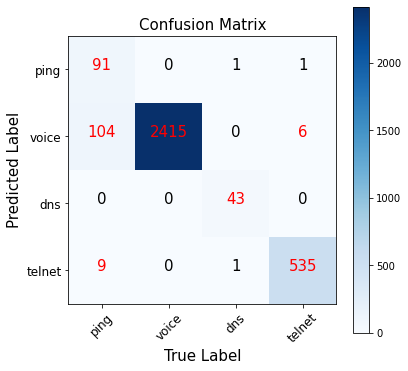

In [70]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'red'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)


We can see the model works well for all classes.

***
### Extension: Principal Component Analysis

A dimension reduction technique meant for large datsets.

*Your data are broken down into principle components, each of which combines the features of the dataset by their correlation into components.* 
*These hold the dataset's variance (aka. spread of data)*

***
#### Normalize data
Now, the data must be scaled to fit inside the same range. 

Meaning must scale the data so that they fall within the same range for PCA to function properly and determine the appropriate covariance among all the features. 

By doing this, one feature won't be able to influence the final components more.

The `StandardScaler Class` from sklearn will remove the mean and scale the data so the have unit variance.

In [71]:
df.drop('Traffic Type',axis=1).values[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Here are the means/std per feature.

In [72]:
df.drop('Traffic Type',axis=1).values.mean(axis=0)

array([  3.19120399, 439.16812227,   3.17373674,   3.72225357,
       437.45633188, 481.37268935,   5.4731753 , 783.24984404,
         5.35168434,   5.95052253, 772.26980661, 818.03680499])

In [73]:
df.drop('Traffic Type',axis=1).values.std(axis=0)

array([  12.12111103, 1702.61177563,   12.12461585,   12.30121093,
       1702.97851503, 1609.1902894 ,   15.25224785, 2214.02400866,
         15.22708618,   14.97064918, 2215.49861177, 2053.11089791])

Here, we fit the scaler.

In [74]:
scaler = StandardScaler()
scaler.fit(df.drop('Traffic Type',axis=1))

StandardScaler()

In [75]:
scaled_data = scaler.transform(df.drop('Traffic Type',axis=1))
scaled_data[0:5]

array([[-0.26327653, -0.25793791, -0.26175978, -0.30259245, -0.25687719,
        -0.29913969, -0.35884385, -0.35376755, -0.3514582 , -0.39747926,
        -0.34857607, -0.39843771],
       [-0.26327653, -0.25793791, -0.26175978, -0.30259245, -0.25687719,
        -0.29913969, -0.35884385, -0.35376755, -0.3514582 , -0.39747926,
        -0.34857607, -0.39843771],
       [-0.26327653, -0.25793791, -0.26175978, -0.30259245, -0.25687719,
        -0.29913969, -0.35884385, -0.35376755, -0.3514582 , -0.39747926,
        -0.34857607, -0.39843771],
       [-0.26327653, -0.25793791, -0.26175978, -0.30259245, -0.25687719,
        -0.29913969, -0.35884385, -0.35376755, -0.3514582 , -0.39747926,
        -0.34857607, -0.39843771],
       [-0.26327653, -0.25793791, -0.26175978, -0.30259245, -0.25687719,
        -0.29913969, -0.35884385, -0.35376755, -0.3514582 , -0.39747926,
        -0.34857607, -0.39843771]])

Here are the new means and standard deviation per feature.

In [76]:
scaled_data.mean(axis=0)

array([ 5.31909721e-17,  0.00000000e+00,  0.00000000e+00,  1.77303240e-17,
       -3.54606481e-17,  7.09212961e-17, -3.54606481e-17,  3.54606481e-17,
        3.54606481e-17,  0.00000000e+00,  1.06381944e-16,  0.00000000e+00])

In [77]:
scaled_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now we will fit PCA model to the data. We will specify n_components=2, because we only want the first 2 principal components.

In [78]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [79]:
scaled_data.shape

(6412, 12)

In [80]:
x_pca = pca.transform(scaled_data)

In [81]:
x_pca.shape

(6412, 2)

***
#### Explained Variance

In [82]:
pca.explained_variance_ratio_

array([0.49629411, 0.43610031])

In [83]:
pca.explained_variance_ratio_.sum()*100

93.23944178756778

From above you can see that our first 2 principal components explain 93.23% of the variance in our data. We can get higher variance explained by increasing the number of principal components to a maximum of 100% with n_components = n_features.

***
#### Plotting the principal components

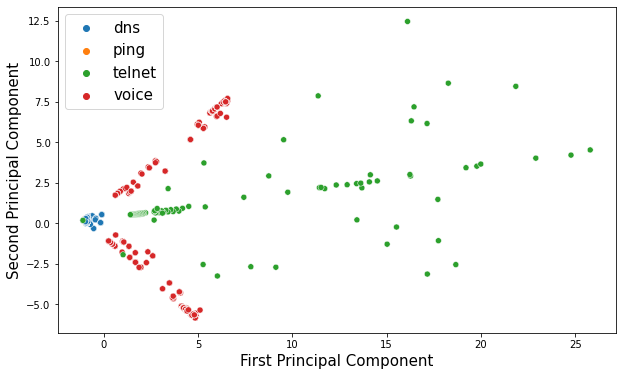

In [84]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df['Traffic Type'])
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.legend(fontsize=15)

From this plot, we can see voice and ping are easy to identify using first 2 principle components. Ping is difficult. That is why we use all the features in our data not just first two components. 

***
#### Decision Boundary w/ PCA
Where the model transitions from forecasting one class to another is known as the decision boundary. We shall once more employ the principle components obtained above for training for visual representational purposes. 

In this manner, we are able to train a model with only two features and see the decision boundary in two dimensions. However, since the actual model would make use of all the features, the decision boundary can change.

We will follow the same steps as above for training a model. We use the coded y as the contour plot that we use below prefers numerical values.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y.cat.codes,test_size=0.3, random_state=101)

In [86]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

The accuracy value is lower when we only use the first 2 principle components, as opposed to the full set of features. Again, this is just for visualization purposes.

In [87]:
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 93.61%


***
#### Plotting
We will first generate a grid of x[0] and x[1] values that we will use to make predictions with.

In [88]:
x_min = x_pca[:,0].min()
x_max = x_pca[:,0].max()
y_min = x_pca[:,1].min()
y_max = x_pca[:,1].max()
spacing = 0.01

In [89]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing))

Now we will make predictions on the grid that we created. The `ravel` function just makes the 2D array that we have above into a 1D array. We will reshape the predictions Z into a 2D array afterwards for plotting

In [90]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Now we will plot the data, and the decision boundaries.

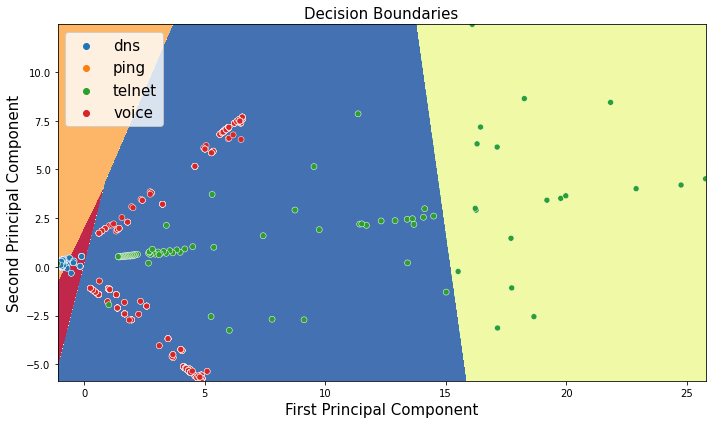

In [91]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df['Traffic Type'], cmap=plt.cm.Spectral)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)

From the above you can see the decision splits. DNS and Telnet traffic are easily classifiable. Ping and Voice are harder to distinguish with only 2 components. 